In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
customers = pd.read_csv('data/Customers.csv')
products = pd.read_csv('data/Products.csv')
transactions = pd.read_csv('data/Transactions.csv')

In [14]:
customers.columns = customers.columns.str.strip().str.lower()
products.columns = products.columns.str.strip().str.lower()
transactions.columns = transactions.columns.str.strip().str.lower()


In [15]:
products['price'] = pd.to_numeric(products['price'], errors='coerce')


In [16]:
products = products.dropna(subset=['price'])


In [17]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerid    200 non-null    object
 1   customername  200 non-null    object
 2   region        200 non-null    object
 3   signupdate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productid    100 non-null    object 
 1   productname  100 non-null    object 
 2   category     100 non-null    object 
 3   price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

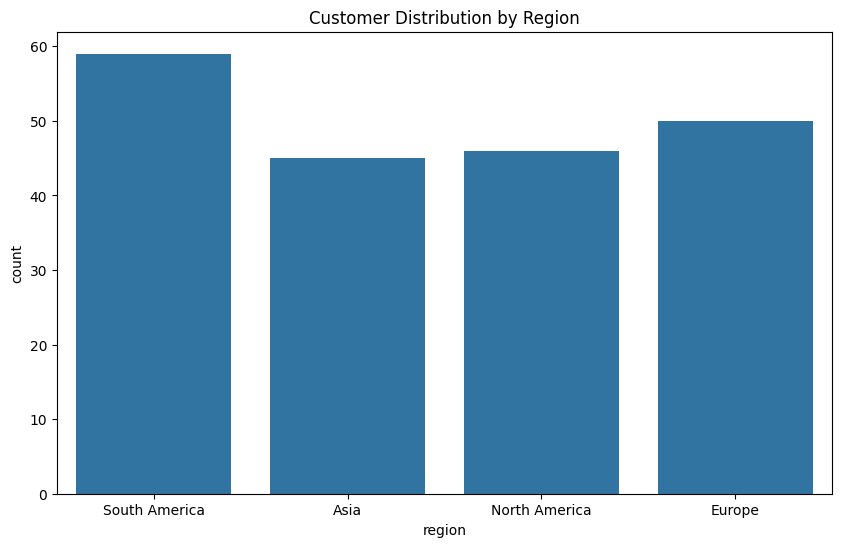

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='region')
plt.title('Customer Distribution by Region')
plt.show()


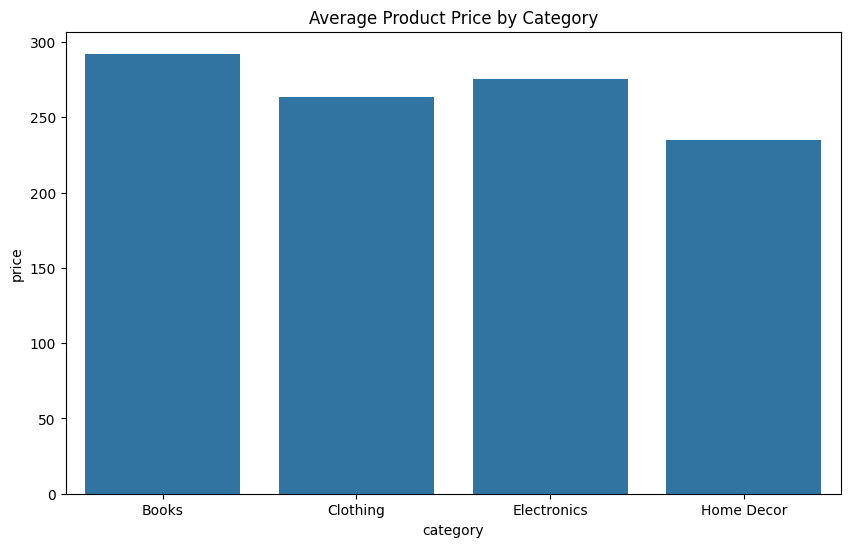

In [19]:
plt.figure(figsize=(10, 6))
numeric_columns = products.select_dtypes(include=[np.number]).columns.tolist()
sns.barplot(data=products.groupby('category')[numeric_columns].mean().reset_index(), x='category', y='price')
plt.title('Average Product Price by Category')
plt.show()


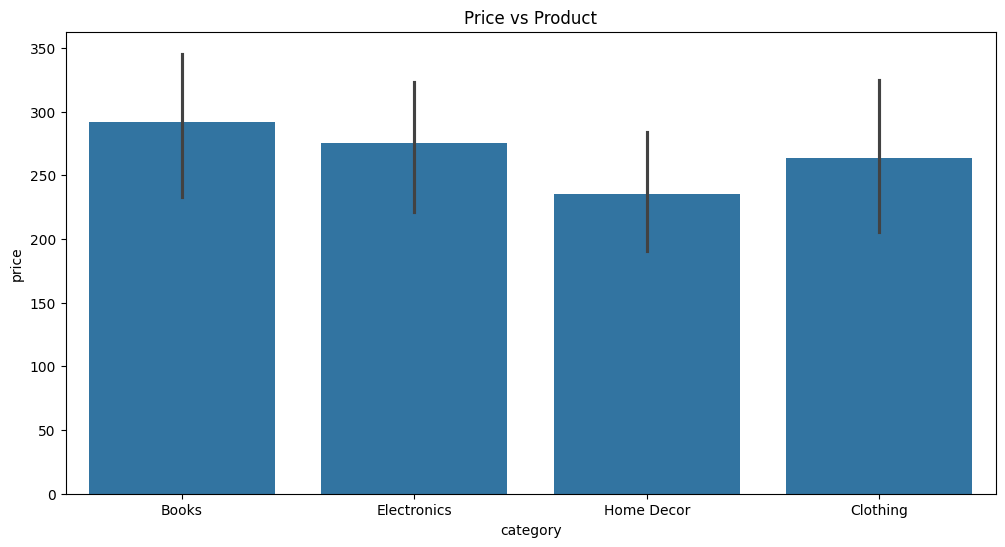

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=products, x='category', y='price')
plt.title('Price vs Product')
plt.show()


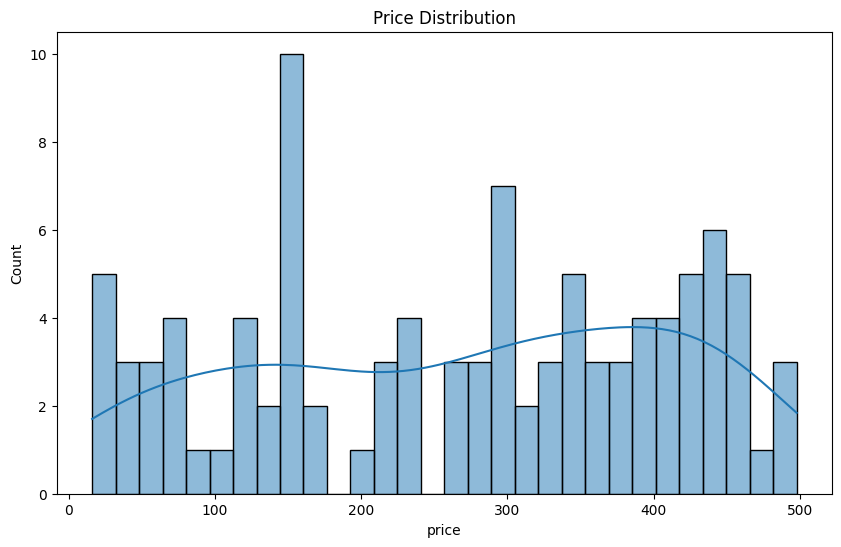

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(products['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

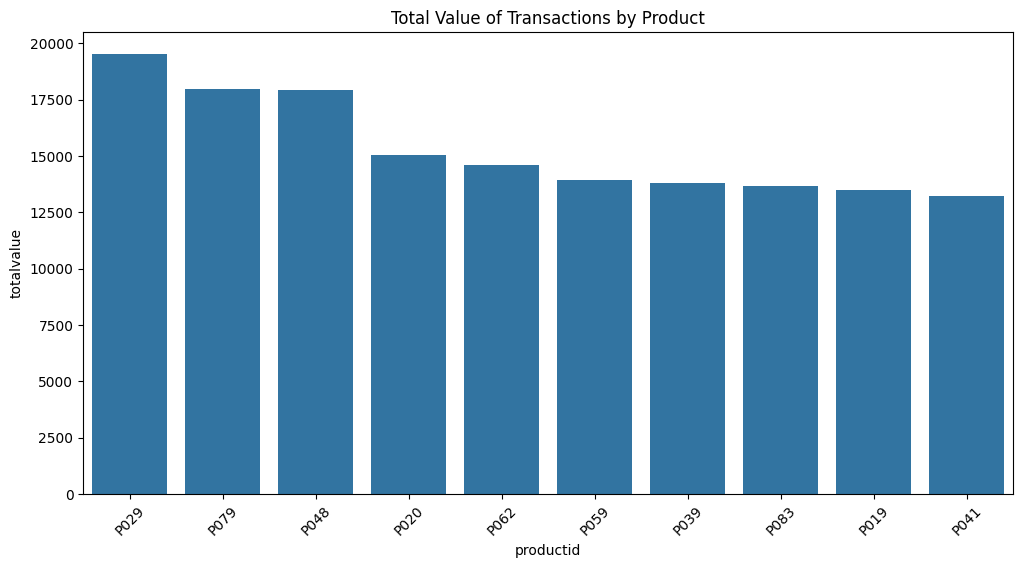

In [38]:
plt.figure(figsize=(12, 6))
total_value_by_product = transactions.groupby('productid')[['totalvalue']].sum().reset_index()
total_value_by_product.sort_values('totalvalue', ascending=False, inplace=True)
sns.barplot(data=total_value_by_product[:10], x='productid', y='totalvalue')
plt.title('Total Value of Transactions by Product')
plt.xticks(rotation=45)
plt.show()


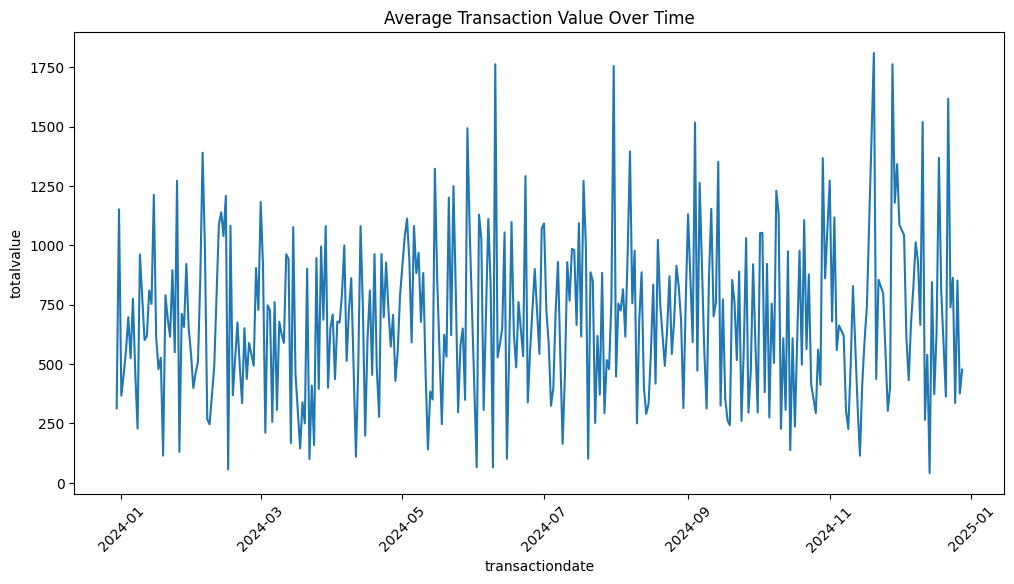

In [37]:
plt.figure(figsize=(12, 6))
transactions['transactiondate'] = pd.to_datetime(transactions['transactiondate'])
avg_transaction_value = transactions.groupby(transactions['transactiondate'].dt.date)[['totalvalue']].mean().reset_index()
sns.lineplot(data=avg_transaction_value, x='transactiondate', y='totalvalue')
plt.title('Average Transaction Value Over Time')
plt.xticks(rotation=45)
plt.show()
